In [1]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand 
import matplotlib.pyplot as plt

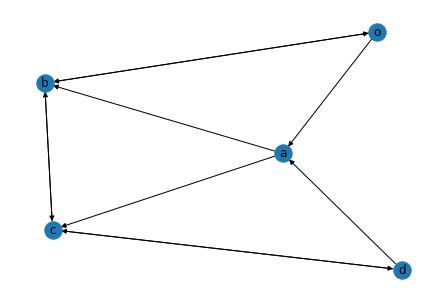

In [2]:
G = nx.DiGraph()
nodes=["o","a","b","c","d"]
for node in nodes:
    G.add_node(node)
G.add_edges_from([("o","a"),("o","b"),("a","c"),("a","b"),("b","o"),("b","c"),("c","b"),("c","d"),("d","a"),("d","c")])
plt.figure()
nx.draw(G,with_labels = True)
plt.savefig("graph_ex1.pdf")

In [3]:
Lambda=np.array([[0,2/5,1/5,0,0],[0,0,3/4,1/4,0],[1/2,0,0,1/2,0
],[0,0,1/3,0,2/3],[0,1/3,0,1/3,0
]])

In [4]:
import numpy as np 
#Estimate pi_bar
w = np.sum(Lambda, axis=1)
w_star = np.max(w)
Q = Lambda/w_star 
# add the diagonal part
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)

pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]


In [20]:
# construct the P matrix (instead of Q) and clock rates w
w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda
n_iterations=10000
# set the number of steps in the simulation
n_steps = 1000
# pos will keep trace of the visited states
pos = np.zeros(n_steps, dtype=int)
# we start from node "a"
pos[0] = 1
# transition_times will store the time instants at which
# jumps/transitions happen
transition_times = np.zeros(n_steps)
# the random time to wait for the next transition
t_next = -np.log(np.random.rand())/w[0]
#for each simulation I store the return time in order to compute the average
tot_time=0
# Compute the cumulative sums of the rows of P
P_cum = np.cumsum(P, axis=1)
for j in range(n_iterations):
    for i in range(1,n_steps):
        # the next state to visit will be extracted according to the probabilities
        # stored in the row of P corresponding to the current state.
        pos[i] = np.argwhere(P_cum[pos[i-1]] > np.random.rand())[0]
        # store the time instant of the current transition
        transition_times[i] = transition_times[i-1] + t_next
        # compute the waiting time to the next transition
        # NOTE: we use the rate w[pos[i]] of the clock of the current position
        t_next = -np.log(np.random.rand())/w[pos[i]]
        tot_time+=t_next
        if pos[i]==1:
            break
print("Return time estimated using simulations: ",tot_time/n_iterations)
print("Estimated return time using theory: ", 1/(w[1]*pi_bar[1]))

Return time estimated using simulations:  6.852175079427473
Estimated return time using theory:  6.750000000000009


In [22]:
#Point c (and d)
# construct the P matrix (instead of Q) and clock rates w
w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

# set the number of steps in the simulation
n_steps = 1000
# pos will keep trace of the visited states
pos = np.zeros(n_steps, dtype=int)
# we start from node "o"
pos[0] = 0
# transition_times will store the time instants at which
# jumps/transitions happen
transition_times = np.zeros(n_steps)
# the random time to wait for the next transition
# is drawn according to its distribution
# NOTE: in the formula for t_next we use the rate of the clock of 
# the current state, in this case w[0].
t_next = -np.log(np.random.rand())/w[0]
tot_time=0
# Compute the cumulative sums of the rows of P
P_cum = np.cumsum(P, axis=1)
for j in range(n_iterations):
    for i in range(1,n_steps):
        # the next state to visit will be extracted according to the probabilities
        # stored in the row of P corresponding to the current state.
        pos[i] = np.argwhere(P_cum[pos[i-1]] > np.random.rand())[0]
        # store the time instant of the current transition
        transition_times[i] = transition_times[i-1] + t_next
        # compute the waiting time to the next transition
        # NOTE: we use the rate w[pos[i]] of the clock of the current position
        t_next = -np.log(np.random.rand())/w[pos[i]]
        tot_time+=t_next
        if pos[i]==4:
            break
#Compute now the hitting time in a theoretical way
# Define the set S and the remaining nodes R
S = [4] # refer to node d
R = [node for node in range(len(G.nodes)) if node not in S]
print(R)

# Restrict P to R x R to obtain hat(P)
hatP = P[np.ix_(R, R)]
capital_omega=[1/wi for wi in w[R]]

# solve the linear system to obtain hat(x)
hatx = np.linalg.solve((np.identity(len(G.nodes)-1)-hatP),capital_omega)
#print(hatx)
# map node to position of node in hatx
map = {0: 0, 1:1,2:2,3:3}

# define the hitting times to the set S
# hitting time is 0 if the starting node is in S
hitting_s = np.zeros(len(G.nodes))
# hitting time is hat(x) for nodes in R
for r in R:
    hitting_s[r] = hatx[map[r]]
print("Estimated hitting times using theory: ",hitting_s)
print("Hitting time estimated using simulations: ", tot_time/n_iterations)


['o', 'a', 'b', 'c', 'd']
[0, 1, 2, 3]
Estimated hitting times using theory:  [8.78571429 7.14285714 7.07142857 3.35714286 0.        ]
Hitting time estimated using simulations:  8.67323143887479


Average final opinions if initial condition is 1 in position 0 and all the other nodes are 0:  0.13043478260869523
Average final opinions if initial condition is 1 in position 1 and all the other nodes are 0:  0.17391304347826037


c:\users\valerio zingarelli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\users\valerio zingarelli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Average final opinions if initial condition is 1 in position 2 and all the other nodes are 0:  0.2608695652173904
Average final opinions if initial condition is 1 in position 3 and all the other nodes are 0:  0.26086956521739013
Average final opinions if initial condition is 1 in position 4 and all the other nodes are 0:  0.1739130434782604


c:\users\valerio zingarelli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\users\valerio zingarelli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\users\valerio zingarelli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: MatplotlibD

pi = [0.13043478 0.17391304 0.26086957 0.26086957 0.17391304]
It's possible to see that consensus is reached in any case


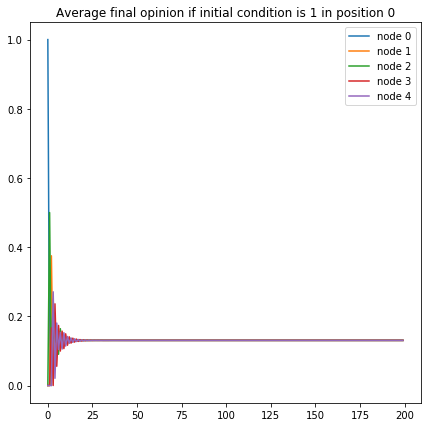

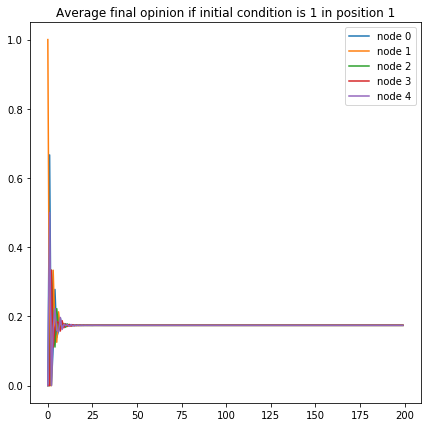

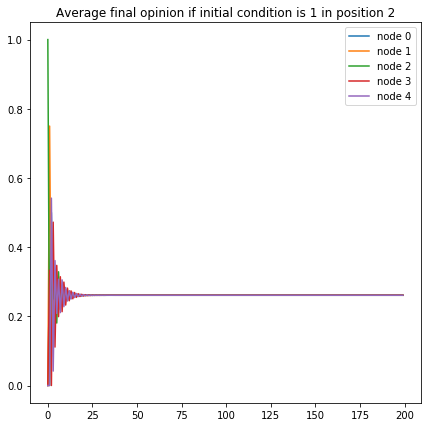

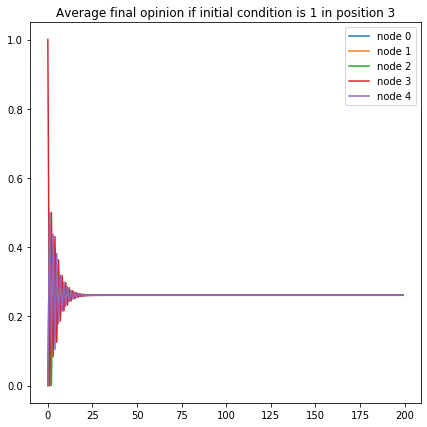

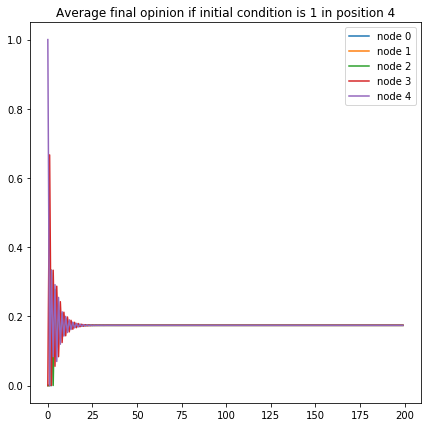

In [33]:
#Point e
degrees = np.sum(Lambda,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ Lambda
n_iter = 200
# keep track of the trajectory
for i in range(len(G.nodes)):
    x = np.zeros((5,n_iter))
    # set initial condition : 1 in position i and 0 otherwise
    x[i,0] = 1
# evolve the states
    for t in range(1,n_iter):
        x[:,t] = P @ x[:,t-1]

    print("Average final opinions if initial condition is 1 in position",i,"and all the other nodes are 0: ", np.mean(x[:,n_iter-1]))
    import matplotlib.pyplot as plt
    plt.figure(i,figsize=(7,7))
    plt.title("Average final opinion if initial condition is 1 in position "+ str(i))
    
    ax = plt.subplot(111)

    for node in range(G.number_of_nodes()):
        trajectory = x[node,:]
        ax.plot(trajectory, label='node {0:d}'.format(node))
    
    ax.legend()
    plt.savefig("Point 1e with 1 in position "+str(i)+".pdf")
#Estimation of pi
w,v = np.linalg.eig(P.T)

for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
    pi = pi/np.sum(pi)
    print("pi =", pi)
print("It's possible to see that consensus is reached in any case")

In [40]:
#Point f


degrees = np.sum(Lambda,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ Lambda
n_iter = 200
n_iterations=1000
consensus_array=[]
# keep track of the trajectory

for iter in range(n_iterations):
    x = np.zeros((5,n_iter))
    for i in range(len(G.nodes)):
        # set initial condition : i.i.d. uniform random variables
        x[i,0] = np.random.uniform(0,1)
    #print("Initial condition: ",x[:,0])
    # evolve the states
    for t in range(1,n_iter):
        #Compute the variance of the consensus value using simulations:

                   
            x[:,t] = P @ x[:,t-1]
    consensus_array.append(np.mean(x[:,n_iter-1]))
#Estimation of pi
w,v = np.linalg.eig(P.T)

for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
    pi = pi/np.sum(pi)
# I apply Var(aX+bY)= a^2*Var(X) +b^2*Var(Y). In fact aplha= sum(pi[i]*x0[i])
var_consensus=0
for pi_ in pi:
    var_consensus+= pi_**2
var_consensus=var_consensus/12
#Now I compute the variance using the simulations:
mean_square_vector=(consensus_array-np.mean(consensus_array))**2
variance_sim= np.mean(mean_square_vector)
print("Variance from simulations: ", variance_sim)
print("Theory variance of consensus: ",var_consensus) #since the variance of a uniform distr. is 1/12 if a=0 and b=1

Variance from simulations:  0.018156379858600465
Theory variance of consensus:  0.017800882167611852


In [ ]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(G.number_of_nodes()):
    trajectory = x[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()

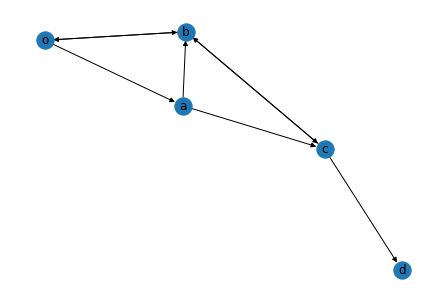

In [35]:
#Point g
G_g=G
G_g.remove_edges_from([("d","c"),("d","a")])
nx.draw(G_g,with_labels=True)
plt.savefig("Graph_g.pdf")

pi=  [0. 0. 0. 0. 1.]
Variance from simulations:  0.08326388103131901
Theory variance of consensus:  0.08333333333333333


c:\users\valerio zingarelli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


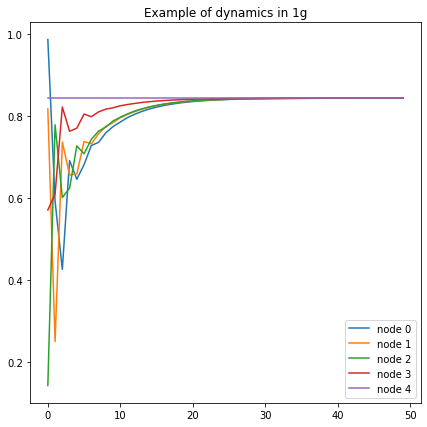

In [72]:
#recompute Lambda
Lambda_g=np.array([[0,2/5,1/5,0,0],[0,0,3/4,1/4,0],[1/2,0,0,1/2,0
],[0,0,1/3,0,2/3],[0,0,0,0,0.00000001]])


degrees = np.sum(Lambda_g,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ Lambda_g
n_iter = 200
consensus_array=[]
# keep track of the trajectory

for iter in range(n_iterations):
    x = np.zeros((5,n_iter))
    for i in range(len(G.nodes)):
        # set initial condition : i.i.d. uniform random variables
        x[i,0] = np.random.uniform(0,1)
    # evolve the states
    for t in range(1,n_iter):

                   
            x[:,t] = P @ x[:,t-1]
    consensus_array.append(np.mean(x[:,n_iter-1]))
import matplotlib.pyplot as plt
plt.figure(i,figsize=(7,7))
plt.title("Example of dynamics in 1g")
    
ax = plt.subplot(111)

for node in range(G.number_of_nodes()):
    trajectory = x[node,:50]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()
plt.savefig("Point 1g.pdf")   
#Estimation of pi
w,v = np.linalg.eig(P.T)

for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real
    pi = pi/np.sum(pi)
    print("pi= ", pi)
var_consensus=0
for pi_ in pi:
    var_consensus+= pi_**2
var_consensus=var_consensus/12
#Now I compute the variance using the simulations:
mean_square_vector=(consensus_array-np.mean(consensus_array))**2
variance_sim= np.mean(mean_square_vector)
print("Variance from simulations: ", variance_sim)
print("Theory variance of consensus: ",var_consensus)

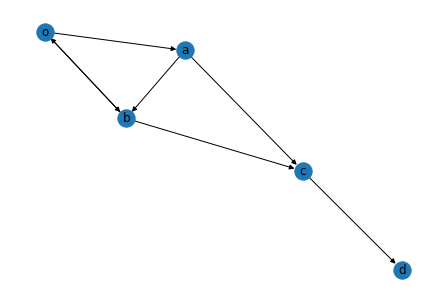

In [65]:
#Point h
G_h=G
G_h.remove_edges_from([("c","b"),("d","a")])
nx.draw(G_h,with_labels=True)
plt.savefig("Point 1h.pdf")

Initial situation:  [1. 0. 0. 1. 1.]
Average consensus value: 0.9999999627048428
If c and d have the same value, consensus is reached; otherwise consensus is not reached


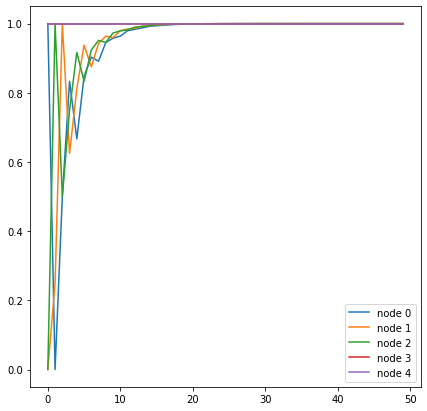

In [71]:
Lambda_h=np.array([[0,2/5,1/5,0,0],[0,0,3/4,1/4,0],[1/2,0,0,1/2,0
],[0,0,0,0,2/3],[0,0,0,1/3,0
]])
degrees = np.sum(Lambda_h,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ Lambda_h
n_iter = 50
# keep track of the trajectory
# set initial condition 
x[:,0] = [1,0,0,1,1]
# evolve the states
for t in range(1,n_iter):
    x[:,t] = P @ x[:,t-1]

import matplotlib.pyplot as plt
plt.figure(i,figsize=(7,7))
ax = plt.subplot(111)
for node in range(G.number_of_nodes()):
    trajectory = x[node,:50]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()
plt.savefig("1h_consensus.pdf")
print("Initial situation: ",x[:,0])
print("Average consensus value:",np.mean(x[:,n_iter-1]))
print("If c and d have the same value, consensus is reached; otherwise consensus is not reached")

# Problem 2

In [ ]:
#EX 2 a
#Same as point 1.a

In [76]:
#EX 2 b
from collections import defaultdict
from random import choice
w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda
max_time = 60

n_iter = 100

P_cum = np.cumsum(P, axis=1)

# the next state to visit will be extracted according to the probabilities
# stored in the row of P_bar corresponding to the current state.
# In general, to extract a value pos[i] in (0,...,num_states-1) according to the discrete
# distribution P_bar[pos[i-1],:], you can extract a random number in [0,1] and compare it with 
# the cumulative sums P_bar_cum[pos[i-1]]. You then pick the first (smallest) state for which
# the cumulative sum is grater than the random number.

particles_tot_cum = defaultdict(lambda: 0)
node_graph_dict=defaultdict(lambda:[])
time_graph_dict=defaultdict(lambda:[])

for i in range(n_iter):
    # initialize a dictionary to save the number of particles in each node
    num_particles = defaultdict(lambda: 0)

    # all 100 particles start from node o
    num_particles[0] = 100

    # initialize a dictionary to save the time of the clock of each node
    time_dic = defaultdict(lambda: 0)
    # the random time to wait for the next transition
    # is drawn according to its distribution, discussed in Remark 2
    # NOTE: in the formula for t_next we use the rate of the clock of 
    # the current state, in this case w[0]*num_particles[0].
    t_nexts = defaultdict(lambda: np.inf)
    t_nexts[0] = -np.log(np.random.rand())/(w[0]*num_particles[0])

    last_update_time = -1

    while time_dic[0] + t_nexts[0] <= max_time or time_dic[1] + t_nexts[1] <= max_time or time_dic[2] + t_nexts[2] <= max_time or time_dic[3] + t_nexts[3] <= max_time or time_dic[4] + t_nexts[4] <= max_time:
        min_time = max_time

        # take the nodes having the smallest next updating time 
        # (there could exist more than one node updating the number 
        # of particles at the same istant)
        for node in range(0, 5):
            if num_particles[node] > 0:
                # a node can have its next update scheduled before the last update, 
                # due to the fact that it has no particles inside at this schedueld time.
                # So in this case the clock run without sending particles.
                if (time_dic[node] + t_nexts[node]) < last_update_time:
                    while time_dic[node]+t_nexts[node] < last_update_time:
                        time_dic[node] += t_nexts[node]
                        t_nexts[node] = -np.log(np.random.rand())/(w[node]*num_particles[node])

                if (time_dic[node] + t_nexts[node]) < min_time:
                    min_time = time_dic[node] + t_nexts[node]

        changing_nodes = []
        for node in range(0, 5):
            if num_particles[node] > 0:
                if (time_dic[node] + t_nexts[node]) == min_time:
                    changing_nodes.append(node)

        last_update_time = min_time

        for node in changing_nodes:
            time_dic[node] += t_nexts[node]
            # update the number of particles in the node
            num_particles[node] -= 1

            out_node = np.argwhere(P_cum[node] > np.random.rand())[0][0]
            #I save last iteration for plotting
            if i ==n_iter-1:
                node_graph_dict[out_node].append(num_particles[out_node])
                time_graph_dict[out_node].append(time_dic[node])
            if np.isinf(t_nexts[out_node]):
                t_nexts[out_node] = -np.log(np.random.rand())/(num_particles[out_node])
            if i ==n_iter-1:
                node_graph_dict[node].append(num_particles[node])
                time_graph_dict[node].append(time_dic[node])
            num_particles[out_node] += 1

            if num_particles[node] > 0:
                # compute the waiting time to the next transition
                t_nexts[node] = -np.log(np.random.rand())/(w[node]*num_particles[node])
            else:
                t_nexts[node] = np.inf

            

    for node in range(0, 5):
        particles_tot_cum[node] += num_particles[node]
    #print(particles_tot_cum.items())
avg_particles = dict()
for node in range(0, 5):
    avg_particles[node] = particles_tot_cum[node]/n_iter

print(avg_particles.items())

c:\users\valerio zingarelli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in double_scalars


dict_items([(0, 18.9), (1, 15.88), (2, 21.64), (3, 21.56), (4, 22.02)])


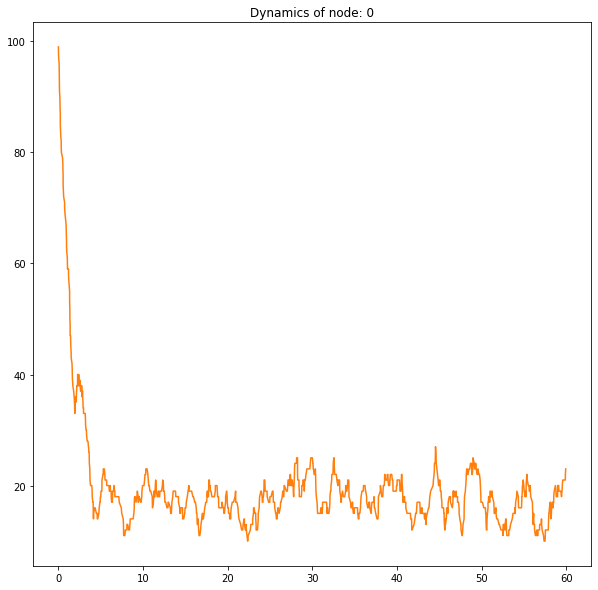

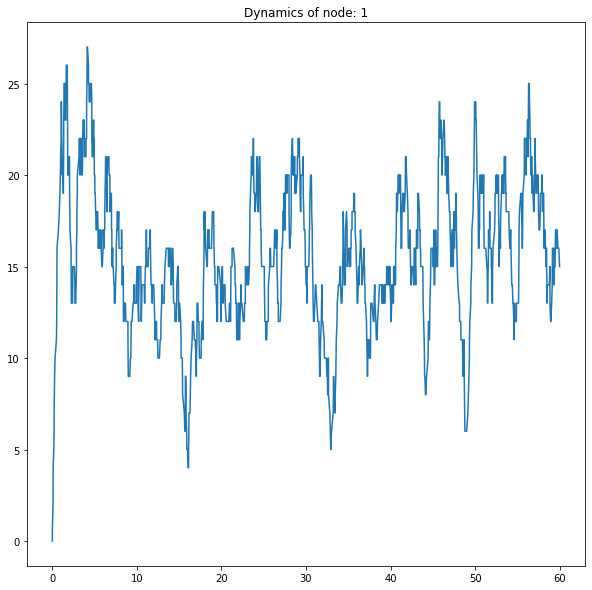

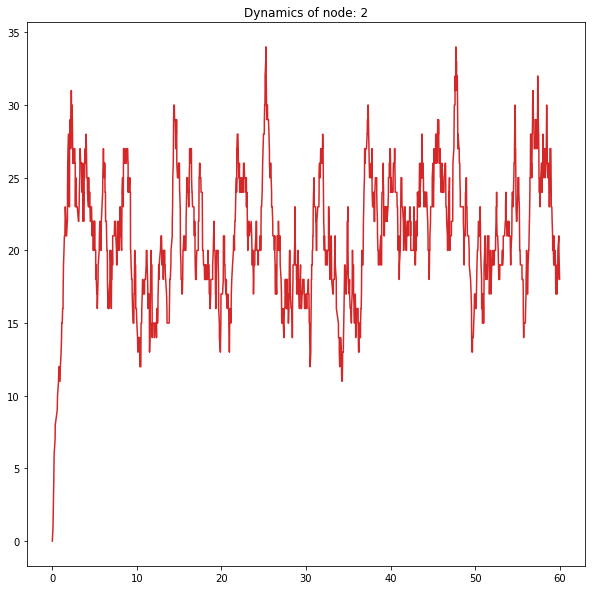

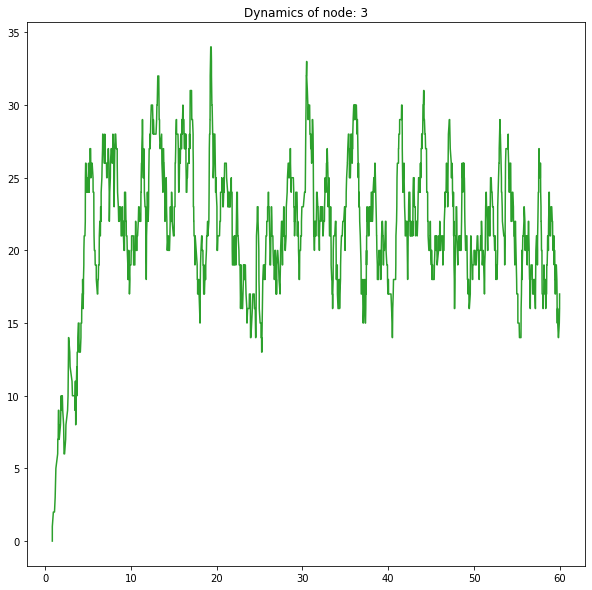

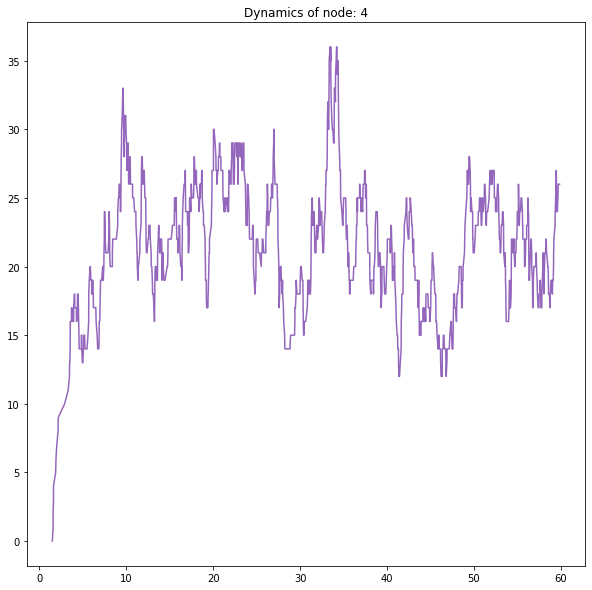

In [83]:
#print a graph of the number of particles for each node only for last iter:
import matplotlib.pyplot as plt
for node,color in zip(range(0,G.number_of_nodes()),["tab:orange","tab:blue","tab:red","tab:green","tab:purple"]):
    plt.figure(figsize=(10,10))
    plt.title("Dynamics of node: "+ str(node))
    plt.plot(time_graph_dict[node],node_graph_dict[node],label='node {0:d}'.format(node),color=color)
    plt.savefig("2b_node "+str(node)+".pdf")

# Problem 3



In this problem, we are asked to determine the dinamycs of an "open" graph

In [85]:
#I add 2 new nodes d' and o' to the network such that they simulate the "exit" and the entrance
#of particles 
Lambda_open=np.array([[0,1,0,0,0,0,0],[0,0,2/3,1/3,0,0,0],[0,0,0,1/4,1/4,1/2,0],[0,0,0,0,1,0,0
],[0,0,0,0,0,1,0],[0,0,0,0,0,0,1],[0,0,0,0,0,1,0]])

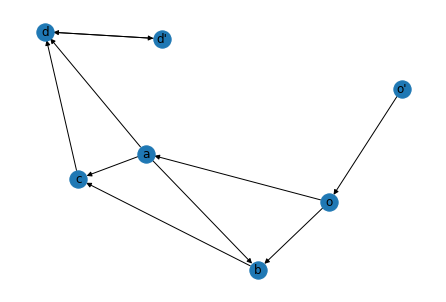

In [112]:
G3 = nx.DiGraph()
nodes=["o'","o","a","b","c","d","d'"]
for node in nodes:
    G3.add_node(node)
G3.add_edges_from([("o'","o"),("o","a"),("o","b"),("a","c"),("a","b"),("a","d"),("b","c"),("c","d"),("d","d'"),("d'","d")])
nx.draw(G3,with_labels = True)
plt.savefig("Graph3.pdf")

# Problem 3.a: Proportional rate

In this problem, the rate of Poisson clock of each node is equal to the number of particles in it.
2 nodes, d' and o', have been added to simulate the exit and the entrance in the graph and they don't update in any case, of course.
The system will be simulated for 60 time units and a graph of the number of particles in each node over time will be provided.


In [107]:
#EX 3 a
from collections import defaultdict
from random import choice
w = np.sum(Lambda_open, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda_open
max_time = 60
P_cum = np.cumsum(P, axis=1)

# the next state to visit will be extracted according to the probabilities
# stored in the row of P_bar corresponding to the current state.
# In general, to extract a value pos[i] in (0,...,num_states-1) according to the discrete
# distribution P_bar[pos[i-1],:], you can extract a random number in [0,1] and compare it with 
# the cumulative sums P_bar_cum[pos[i-1]]. You then pick the first (smallest) state for which
# the cumulative sum is grater than the random number.
node_graph_dict=defaultdict(lambda:[])
time_graph_dict= defaultdict(lambda: [])
#for i in range(n_iter):
# initialize a dictionary to save the number of particles in each node
num_particles = defaultdict(lambda: 0)
rate=10000
# we start with no particles= rate
num_particles[0] = rate
# initialize a dictionary to save the time of the clock of each node
time_dic = defaultdict(lambda: 0)

    # the random time to wait for the next transition
    # is drawn according to its distribution, discussed in Remark 2
    # NOTE: in the formula for t_next we use the rate of the clock of 
    # the current state, in this case w[0]*num_particles[0].
t_nexts = defaultdict(lambda: np.inf)
t_nexts[0] = -np.log(np.random.rand())/num_particles[0]

last_update_time = -1

while time_dic[0] + t_nexts[0] <= max_time or time_dic[1] + t_nexts[1] <= max_time or time_dic[2] + t_nexts[2] <= max_time or time_dic[3] + t_nexts[3] <= max_time or time_dic[4] + t_nexts[4] <= max_time:
    min_time = max_time

    # take the nodes having the smallest next updating time 
    # (there could exist more than one node updating the number 
    # of particles at the same istant)
    for node in range(0, 6):
        #print(node, num_particles[node], time_dic[node],t_nexts[node], time_dic[node]+t_nexts[node])
        if num_particles[node] > 0:
            # a node can have its next update scheduled before the last update, 
            # due to the fact that it has no particles inside at this schedueld time.
            # So in this case the clock run without sending particles.
            if (time_dic[node] + t_nexts[node]) < last_update_time:
                while time_dic[node]+t_nexts[node] < last_update_time:
                    time_dic[node] += t_nexts[node]
                    t_nexts[node] = -np.log(np.random.rand())/num_particles[node]

            if (time_dic[node] + t_nexts[node]) < min_time:
                min_time = time_dic[node] + t_nexts[node]

    changing_nodes = []
    for node in range(len(G3.nodes)):
        if num_particles[node] > 0:
            if (time_dic[node] + t_nexts[node]) == min_time:
                changing_nodes.append(node)

    last_update_time = min_time

    for node in changing_nodes:
        #Update number of particles unless the node is the "source"
        time_dic[node] += t_nexts[node]
        if node!=0:
            num_particles[node] -= 1
        
        
        #where the particle will go
        out_node = np.argwhere(P_cum[node] > np.random.rand())[0][0]
        if out_node!=6:
            num_particles[out_node] += 1
            node_graph_dict[out_node].append(num_particles[out_node])
            time_graph_dict[out_node].append(time_dic[node])
            if np.isinf(t_nexts[out_node]):
                t_nexts[out_node] = -np.log(np.random.rand())/(num_particles[out_node])
        
        node_graph_dict[node].append(num_particles[node])
        time_graph_dict[node].append(time_dic[node])
        
        if num_particles[node] > 0:
            # compute the waiting time for the next transition
            t_nexts[node] = -np.log(np.random.rand())/(num_particles[node])
        else:
            t_nexts[node] = np.inf
            
        
        
        
res= [(key,value) for (key,value) in num_particles.items() if key in [1,2,3,4,5]  ]    
print(res)

[(1, 10031), (2, 6720), (3, 4956), (4, 6765), (5, 10028)]


c:\users\valerio zingarelli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
c:\users\valerio zingarelli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
c:\users\valerio zingarelli\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


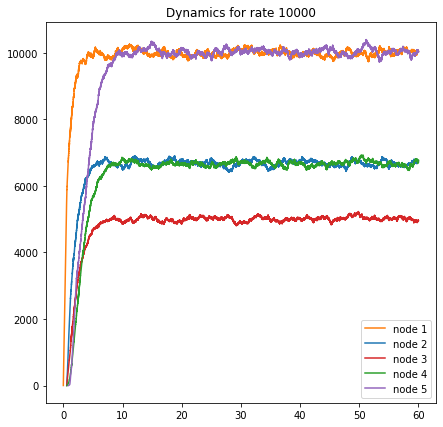

In [114]:

plt.figure(figsize=(7,7))
for node,color in zip(range(1,G3.number_of_nodes()-1),["tab:orange","tab:blue","tab:red","tab:green","tab:purple"]):
    
    plt.title("Dynamics for rate "+str(rate))
    plt.plot(time_graph_dict[node],node_graph_dict[node],label='node {0:d}'.format(node),color=color)
    
plt.legend()
plt.savefig("3a_"+str(rate)+".pdf")

# Problem 3b
The resolution of this task is the same of solving the previous one. In this case, the maximum rate that the system can substain is:
$$
\it{rate} = 1
$$

In fact, since the "source" is much more faster then the other nodes, node "o" will not be able to send a particle before receiving the new one

In [131]:
from collections import defaultdict
from random import choice
w = np.sum(Lambda_open, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda_open
max_time = 60
P_cum = np.cumsum(P, axis=1)

# the next state to visit will be extracted according to the probabilities
# stored in the row of P_bar corresponding to the current state.
# In general, to extract a value pos[i] in (0,...,num_states-1) according to the discrete
# distribution P_bar[pos[i-1],:], you can extract a random number in [0,1] and compare it with 
# the cumulative sums P_bar_cum[pos[i-1]]. You then pick the first (smallest) state for which
# the cumulative sum is grater than the random number.
node_graph_dict=defaultdict(lambda:[])
time_graph_dict= defaultdict(lambda: [])
#for i in range(n_iter):
# initialize a dictionary to save the number of particles in each node
num_particles = defaultdict(lambda: 0)
#Maximum admitted rate is 1 since the source is a lot faster then the other nodes
rate=1
# we start with no particles= rate
num_particles[0] = rate
# initialize a dictionary to save the time of the clock of each node
time_dic = defaultdict(lambda: 0)

# the random time to wait for the next transition
# is drawn according to its distribution, discussed in Remark 2
    # NOTE: in the formula for t_next we use the rate of the clock of 
    # the current state, in this case w[0]*num_particles[0].
t_nexts = defaultdict(lambda: np.inf)
t_nexts[0] = -np.log(np.random.rand())/rate

last_update_time = -1

while time_dic[0] + t_nexts[0] <= max_time or time_dic[1] + t_nexts[1] <= max_time or time_dic[2] + t_nexts[2] <= max_time or time_dic[3] + t_nexts[3] <= max_time or time_dic[4] + t_nexts[4] <= max_time:
    min_time = max_time

    # take the nodes having the smallest next updating time 
    # (there could exist more than one node updating the number 
    # of particles at the same istant)
    for node in range(0, 7):
        #print(node, num_particles[node], time_dic[node],t_nexts[node], time_dic[node]+t_nexts[node])
        if num_particles[node] > 0:
            # a node can have its next update scheduled before the last update, 
            # due to the fact that it has no particles inside at this schedueld time.
            # So in this case the clock run without sending particles.
            if (time_dic[node] + t_nexts[node]) < last_update_time:
                while time_dic[node]+t_nexts[node] < last_update_time:
                    time_dic[node] += t_nexts[node]
                    if node==0:
                        t_nexts[node]=-np.log(np.random.rand())/rate
                    else:
                        t_nexts[node] = -np.log(np.random.rand())

            if (time_dic[node] + t_nexts[node]) < min_time:
                min_time = time_dic[node] + t_nexts[node]

    changing_nodes = []
    for node in range(len(G3.nodes)):
        if num_particles[node] > 0:
            if (time_dic[node] + t_nexts[node]) == min_time:
                changing_nodes.append(node)

    last_update_time = min_time

    for node in changing_nodes:
        #If we have to update node 0, we make another particle enter
        if node!=0:
            num_particles[node] -= 1
        time_dic[node] += t_nexts[node]
        
        #where the particle will go
        out_node = np.argwhere(P_cum[node] > np.random.rand())[0][0]
        if out_node!=6:
            num_particles[out_node] += 1
            node_graph_dict[out_node].append(num_particles[out_node])
            time_graph_dict[out_node].append(time_dic[node])
            if np.isinf(t_nexts[out_node]):
                t_nexts[out_node] = -np.log(np.random.rand())
        
        node_graph_dict[node].append(num_particles[node])
        time_graph_dict[node].append(time_dic[node])
        
        if num_particles[node] > 0:
            # compute the waiting time for the next transition
            if node==0:
                t_nexts[node]=-np.log(np.random.rand())/rate
            else:
                t_nexts[node] = -np.log(np.random.rand())
        else:
            t_nexts[node] = np.inf
            
        
#I print only the particles of the "true graph", the one without o' and d'  
res= [(key,value) for (key,value) in num_particles.items() if key in [1,2,3,4,5]  ]    
print(res)

[(1, 5), (2, 1), (3, 0), (4, 8), (5, 1)]


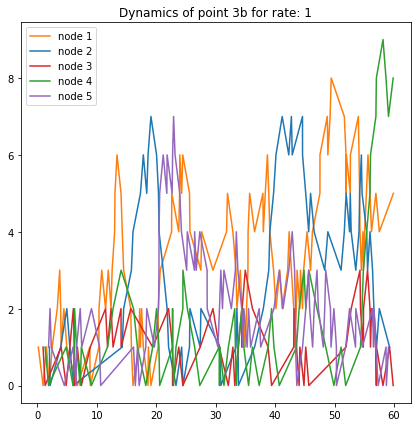

In [136]:
#I plot a graph for each node
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
for node,color in zip(range(1,G3.number_of_nodes()-1),["tab:orange","tab:blue","tab:red","tab:green","tab:purple"]):

    plt.title("Dynamics of point 3b for rate: "+str(rate))
    plt.plot(time_graph_dict[node],node_graph_dict[node],label='node {0:d}'.format(node),color=color)
plt.legend()
plt.savefig("Point_3b"+str(rate)+".pdf")